In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import sys
import pickle
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize_fitness import EnsembleProcessProtocolData, InjectionKlDistance
from src.visualization.analyze_trajectories import EntropyDistributions, dict_to_array, compute_n_ave
import matplotlib.image as mpimg
import os
from src.data.gillespie_models import define_n_initial
from src.general.io_handling import pickle_in_data
from src.visualization.visualize_fitness import Injection

In [2]:
def plot_gaussian(sigma):
    x_array = np.linspace(-10, 10, 100)
    p = (1 / np.sqrt(2 * np.pi * (sigma ** 2))) * np.exp(-(np.array(x_array)) ** (2) / (2 * (sigma ** 2)))
    
    return x_array, p

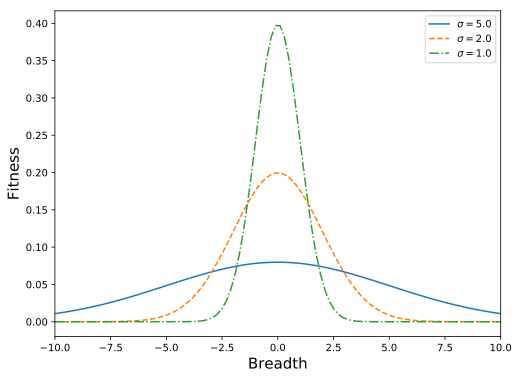

In [31]:
plt.figure(figsize=(8,6))

x_array, p = plot_gaussian(5.0)
plt.plot(x_array, p, label="$\\sigma = 5.0$")

x_array, p = plot_gaussian(2.0)
plt.plot(x_array, p, label="$\\sigma = 2.0$", linestyle='--')

x_array, p = plot_gaussian(1.0)
plt.plot(x_array, p, label="$\\sigma = 1.0$", linestyle='-.')

plt.legend()

plt.xlim(-10, 10)
plt.ylabel("Fitness", size=15)
plt.xlabel("Breadth", size=15)
plt.savefig("Proof_Figures/Fig_1_fitness_breadth.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

# plt.ylim(0, 0.4)

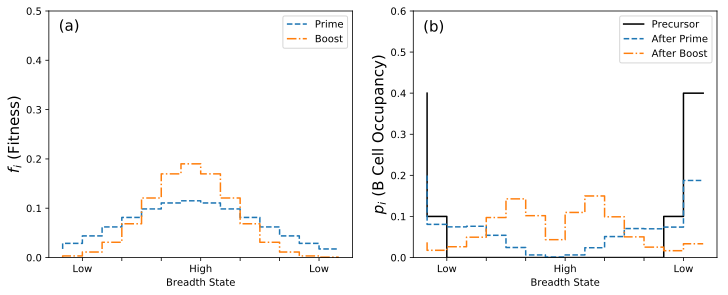

In [4]:
plt.figure(figsize=(12,10))

f1 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/fitness")
f2 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/injection_2_sig_0.7/fitness")
# f3 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/injection_2_sig_0.7/injection_3_sig_0.3/fitness")

ax = plt.subplot(2,2,1)
x_array = range(1, 16)
ax.step(x_array, f1, label="Prime", linestyle='--')
ax.step(x_array, f2, label="Boost", linestyle='-.')
# ax.step(x_array, f3, label="Boost 2")
# plt.axhline(0.02, color='black', linestyle='--', label="death rate")
plt.text(0.8, 0.46, "(a)", size=15)

labels = [item.get_text() for item in ax.get_xticklabels()]

empty_string_labels = ['']*len(labels)
empty_string_labels[4] = "High"
empty_string_labels[1] = empty_string_labels[-2] = "Low"
ax.set_xticklabels(empty_string_labels)

plt.xlabel("Breadth State")
plt.ylabel("$f_{i}$ (Fitness)", size=15)
plt.ylim(0, 0.5)
plt.legend()

p0 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/event_prob")
p1 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/injection_2_sig_0.7/event_prob")
p2 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/injection_2_sig_0.7/injection_3_sig_0.3/event_prob")
# n_ave_3 = np.loadtxt("../../data/raw/sequential_cocktail_2/Sequential/Sigma_1.2/injection_2_sig_0.7/injection_3_sig_0.3/n_ave")
# p3 = n_ave_3/np.sum(n_ave_3)

ax2 = plt.subplot(2,2,2)
x_array = range(1, 16)
ax2.step(x_array, p0, label="Precursor", color='black')
ax2.step(x_array, p1, label="After Prime", linestyle='--')
ax2.step(x_array, p2, label="After Boost", linestyle='-.')
# ax2.step(x_array, p3, label="After Boost 2")
# plt.axhline(0.02, color='black', linestyle='--', label="death rate")
plt.text(0.8, 0.55, "(b)", size=15)

labels = [item.get_text() for item in ax2.get_xticklabels()]

empty_string_labels = ['']*len(labels)
empty_string_labels[4] = "High"
empty_string_labels[1] = empty_string_labels[-2] = "Low"
ax2.set_xticklabels(empty_string_labels)

plt.xlabel("Breadth State")
plt.ylabel("$p_{i}$ (B Cell Occupancy)", size=15)
plt.ylim(0, 0.175)
plt.legend()
plt.ylim(0, 0.6)
# plt.savefig("fitness_precursor.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)
# plt.savefig("Fig_2_fitness_occupancy.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)
plt.savefig("Proof_Figures/Fig_2_fitness_occupancy_step.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)


In [6]:
mean_bnab_array[0][-8]

2114.666667

In [7]:
mean_bnab_array[0][-6]

3097.7

In [8]:
mean_bnab_array[0][-3]

1872.9

In [2]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'
sigma_list = [1.3, 1.2, 1.1]
fitness_array = []
kl1_array = []

for sigma in sigma_list:
    trial_path = path + "Sigma_{0}/".format(sigma)
    p0 = np.loadtxt(trial_path + "p0")
    
    kl1 = InjectionKlDistance(p0, sigma=sigma, num_odes=len(p0) + 1)
    fitness_array.append(kl1.f)
    kl1_array.append(kl1.compute_kl_distance())


Text(0.5,1,'Prime, K = 32')

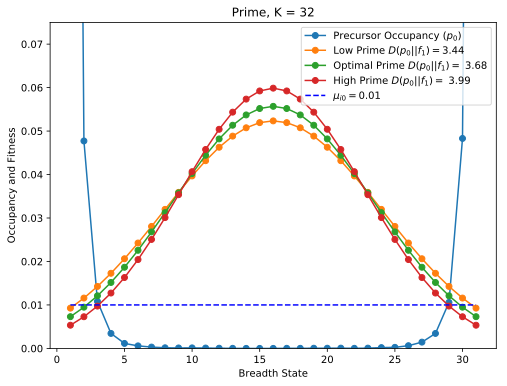

In [3]:
plt.figure(figsize=(8,6))

x = range(1, 32)

plt.plot(x, p0, marker='o', label="Precursor Occupancy ($p_{0}$)")
plt.plot(x, fitness_array[0], marker='o', label="Low Prime $D(p_{0} || f_{1}) = $" + "{:.2f}".format(kl1_array[0]))
plt.plot(x, fitness_array[1], marker='o', label="Optimal Prime $D(p_{0} || f_{1}) = $ " + "{:.2f}".format(kl1_array[1]))
plt.plot(x, fitness_array[2], marker='o', label="High Prime $D(p_{0} || f_{1}) = $ " + "{:.2f}".format(kl1_array[2]))
plt.plot(x, np.zeros_like(x) + 0.01, 
         color='blue', linestyle='--', label="$\\mu_{i0} = 0.01$")

plt.legend()
plt.ylim(0, 0.075)
plt.xlabel("Breadth State")
plt.ylabel("Occupancy and Fitness")
plt.title("Prime, K = 32")
# plt.savefig("fitness_occupancy_figures/prime_k_32.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)


In [4]:
'/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'

'/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'

In [5]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.01_muij_0.05_bins_31/'
sigma = 1.2
sigma_path = path + "Sigma_{0}/".format(sigma)
kl2_array = []
sigma2_range = np.loadtxt(sigma_path + "sigma2_range")
n_ave = np.loadtxt(sigma_path + "n_ave")
p1 = n_ave / np.sum(n_ave)
b_cells = pickle_in_data(sigma_path + "total_b_cells")
num_gcs = 1000

p0 = np.loadtxt(sigma_path + "p0")
kl1 = InjectionKlDistance(p0, sigma=sigma, num_odes=len(p0) + 1)

f2_array = []
for sigma2 in sigma2_range:
    kl2 = InjectionKlDistance(p1, sigma=sigma2, num_odes=len(p1) + 1)
    kl2_array.append(kl2.compute_kl_distance())
    f2_array.append(kl2.f)
    

/home/rganti/Optimal_Protocols_bnAbs/src/visualization/visualize_fitness.py:28: RuntimeWarning: divide by zero encountered in log
  h_fitness = -np.sum(self.f * np.log(self.f))
/home/rganti/Optimal_Protocols_bnAbs/src/visualization/visualize_fitness.py:28: RuntimeWarning: invalid value encountered in multiply
  h_fitness = -np.sum(self.f * np.log(self.f))
/home/rganti/Optimal_Protocols_bnAbs/src/visualization/visualize_fitness.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  kl_distance.append(self.p_ini[i] * np.log(self.p_ini[i] / self.f[i]))


In [6]:
kl1.compute_kl_distance()

3.678022854649851

In [7]:
np.array(b_cells[1])/1000

array([ 3.493,  9.938, 20.902, 27.341, 23.326, 12.577,  4.765,  1.254,
        0.601])

In [8]:
kl2_array

[1.4904658527518126,
 3.28701612337792,
 7.281307202293533,
 15.732601085548577,
 33.21048352954204,
 68.97038899454309,
 141.7569790109978,
 289.56867673980946,
 inf]

Text(0.5,1,'Boost, K = 32, $D(p_{0} || f_{1}) = $3.68')

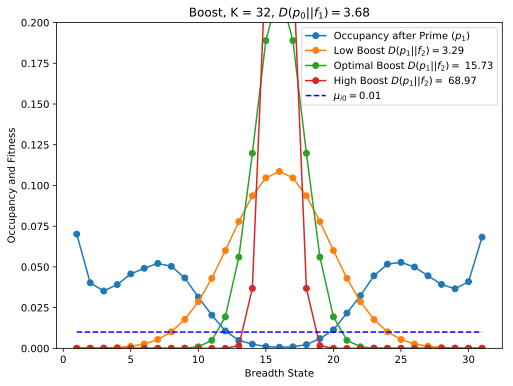

In [9]:
plt.figure(figsize=(8,6))

x = range(1, 32)

plt.plot(x, p1, marker='o', label="Occupancy after Prime ($p_{1}$)")
plt.plot(x, f2_array[1], marker='o', label="Low Boost $D(p_{1} || f_{2}) = $" + "{:.2f}".format(kl2_array[1]))
plt.plot(x, f2_array[3], marker='o', label="Optimal Boost $D(p_{1} || f_{2}) = $ " + "{:.2f}".format(kl2_array[3]))
plt.plot(x, f2_array[5], marker='o', label="High Boost $D(p_{1} || f_{2}) = $ " + "{:.2f}".format(kl2_array[5]))
plt.plot(x, np.zeros_like(x) + 0.01, 
         color='blue', linestyle='--', label="$\\mu_{i0} = 0.01$")

plt.legend(loc=1)
plt.ylim(0, 0.2)
plt.xlabel("Breadth State")
plt.ylabel("Occupancy and Fitness")
plt.title("Boost, K = 32, $D(p_{0} || f_{1}) = $" + "{:.2f}".format(kl1.compute_kl_distance()))
# plt.savefig("fitness_occupancy_figures/boost_k_32.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)


In [10]:
kl2_array

[1.4904658527518126,
 3.28701612337792,
 7.281307202293533,
 15.732601085548577,
 33.21048352954204,
 68.97038899454309,
 141.7569790109978,
 289.56867673980946,
 inf]

In [12]:
np.array(b_cells[1]) / num_gcs

array([ 3.493,  9.938, 20.902, 27.341, 23.326, 12.577,  4.765,  1.254,
        0.601])

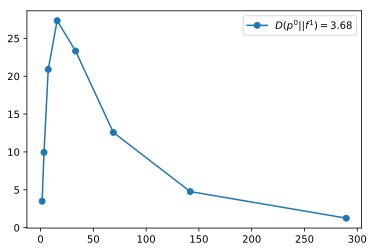

In [13]:
plt.plot(kl2_array, np.array(b_cells[1]) / num_gcs, 
         marker='o', label='$D(p^{0} || f^{1}) = ' + '%.2f' % kl1.compute_kl_distance() + ' $')

plt.legend()


In [14]:
kl2_array

[1.4904658527518126,
 3.28701612337792,
 7.281307202293533,
 15.732601085548577,
 33.21048352954204,
 68.97038899454309,
 141.7569790109978,
 289.56867673980946,
 inf]

In [15]:
np.array(b_cells[2])/ num_gcs

array([ 7.503, 19.403, 30.773, 23.032,  7.203,  2.029,  0.708,  0.233,
        0.087])

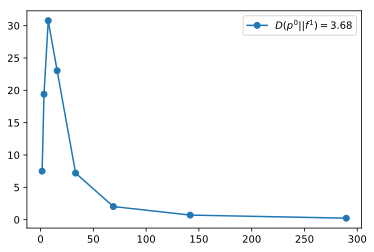

In [16]:
plt.plot(kl2_array, np.array(b_cells[2]) / num_gcs, 
         marker='o', label='$D(p^{0} || f^{1}) = ' + '%.2f' % kl1.compute_kl_distance() + ' $')

plt.legend()
# plt.xlim(0, 30)

In [11]:
sigma_list = [1.3, 1.2, 1.0]
fitness_array = []
kl1_array = []

path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/'

for sigma in sigma_list:
    trial_path = path + "Sigma_{0}/Trial_0/".format(sigma)
    p0_mean = np.loadtxt(trial_path + "event_prob")

    kl1 = InjectionKlDistance(p0_mean, sigma=sigma, num_odes=len(p0_mean) + 1)
    fitness_array.append(kl1.f)
    kl1_array.append(kl1.compute_kl_distance())

Text(0.5,1,'Prime, K = 16')

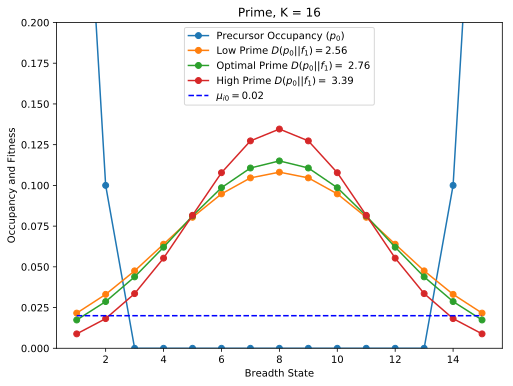

In [12]:
plt.figure(figsize=(8,6))

x = range(1, 16)

plt.plot(x, p0_mean, marker='o', label="Precursor Occupancy ($p_{0}$)")
plt.plot(x, fitness_array[0], marker='o', label="Low Prime $D(p_{0} || f_{1}) = $" + "{:.2f}".format(kl1_array[0]))
plt.plot(x, fitness_array[1], marker='o', label="Optimal Prime $D(p_{0} || f_{1}) = $ " + "{:.2f}".format(kl1_array[1]))
plt.plot(x, fitness_array[2], marker='o', label="High Prime $D(p_{0} || f_{1}) = $ " + "{:.2f}".format(kl1_array[2]))
plt.plot(x, np.zeros_like(x) + 0.02, 
         color='blue', linestyle='--', label="$\\mu_{i0} = 0.02$")

plt.legend()
plt.ylim(0, 0.2)
plt.xlabel("Breadth State")
plt.ylabel("Occupancy and Fitness")
plt.title("Prime, K = 16")
# plt.savefig("fitness_occupancy_figures/prime_k_16.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

Text(0.5,0,'$D(p^{0} || f^{1})$')

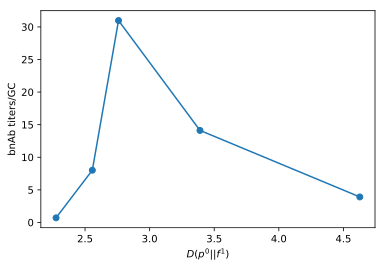

In [13]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/'
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_arrays()
optimal_bnabs = np.loadtxt(path + "optimal_pairs_bnabs")
plt.plot(protocol_data.kl1_array, optimal_bnabs/100, marker='o')
plt.ylabel("bnAb titers/GC")
plt.xlabel("$D(p^{0} || f^{1})$")

In [14]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/Sigma_1.2/'
sigma1 = 1.2

mean_bnab_array = []
error_bnab_array = []
kl1_array = []
fitness_array = []

mean_bnab_array.append(np.loadtxt(path + "mean_bnabs"))
error_bnab_array.append(np.loadtxt(path + "error_bnabs"))

trial_path = path + "Trial_0/".format(0)
p0_mean = np.loadtxt(trial_path + "event_prob")

kl1 = InjectionKlDistance(p0_mean, sigma=sigma1, num_odes=len(p0_mean) + 1)
kl1_array.append(kl1.compute_kl_distance())

fitness_array.append(kl1.f)

sigma2_range = np.loadtxt(trial_path + "sigma2_range")

f2_array = []
kl2_array = []
p1 = []

for t in range(0, 30):
    trial_path = path + "Trial_{0}/".format(t)
    p1.append(np.loadtxt(trial_path + "n_ave"))

p1_mean = np.mean(p1, axis=0) / np.sum(np.mean(p1, axis=0))


for sigma2 in sigma2_range:
    kl2 = InjectionKlDistance(p1_mean, sigma=sigma2, num_odes=len(p1_mean) + 1)
    f2_array.append(kl2.f)
    kl2_array.append(kl2.compute_kl_distance())

In [15]:
gc_prime = len(np.loadtxt(trial_path + "successful_exit"))
gc_boost_survival = []
trial_path = path + "Trial_{0}/".format(0)
for sigma in sigma2_range[:-1]:
    gc_boost_survival.append(len(np.loadtxt(trial_path + "injection_2_sig_{:.2f}/successful_exit".format(sigma))))
    

Text(0,0.5,'Boost GC Survival Fraction')

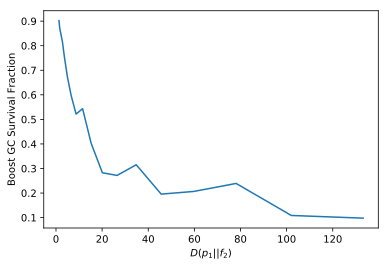

In [16]:
plt.plot(kl2_array[:-1], np.array(gc_boost_survival, float)/ gc_prime)
plt.xlabel("$D(p_{1} || f_{2})$")
plt.ylabel("Boost GC Survival Fraction")

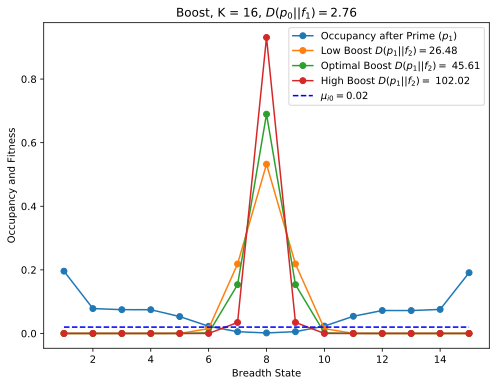

In [18]:
plt.figure(figsize=(8,6))

x = range(1, 16)

plt.plot(x, p1_mean, marker='o', label="Occupancy after Prime ($p_{1}$)")
plt.plot(x, f2_array[-8], marker='o', label="Low Boost $D(p_{1} || f_{2}) = $" + "{:.2f}".format(kl2_array[-8]))
plt.plot(x, f2_array[-6], marker='o', label="Optimal Boost $D(p_{1} || f_{2}) = $ " + "{:.2f}".format(kl2_array[-6]))
plt.plot(x, f2_array[-3], marker='o', label="High Boost $D(p_{1} || f_{2}) = $ " + "{:.2f}".format(kl2_array[-3]))
plt.plot(x, np.zeros_like(x) + 0.02, 
         color='blue', linestyle='--', label="$\\mu_{i0} = 0.02$")

plt.legend(loc=1)
# plt.ylim(0, 0.2)
plt.xlabel("Breadth State")
plt.ylabel("Occupancy and Fitness")
plt.title("Boost, K = 16, $D(p_{0} || f_{1}) = $" + "{:.2f}".format(kl1_array[0]))
plt.savefig("fitness_occupancy_figures/boost_k_16.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

Text(0,0.5,'Number of bnAbs/GC')

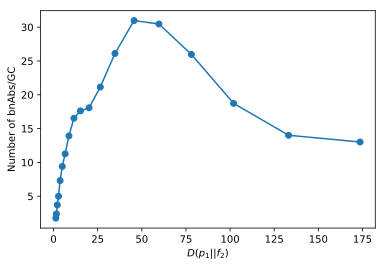

In [53]:
plt.errorbar(kl2_matrix[0], mean_bnab_array[0]/100, 
             marker='o', label='$D(p_{0} || f_{1}) = ' + '%.2f' % kl1_array[0] + ', \\sigma_{1} = %.2f' % sigma1 + ' $')
plt.xlabel("$D(p_{1} || f_{2})$")
plt.ylabel("Number of bnAbs/GC")

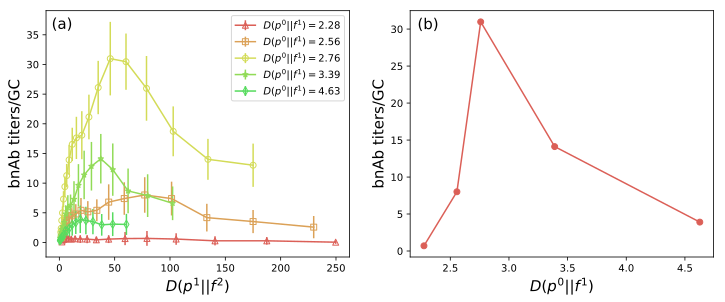

In [21]:
plt.figure(figsize=(12,10))
sns.set_palette(sns.color_palette("hls", 12))
plt.subplot(2,2,1)
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/'
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_arrays()
protocol_data.plot_protocols()
plt.text(-7.0, 36.00, "(a)", size=15)
# plt.text(left, top, "(a)", size=15)
# plt.title("Protocols, $N_{bins} = 15$", size=15)
# plt.title("Immunization Protocols", size=15)
plt.legend()

sns.set_palette(sns.color_palette("hls", 12))
plt.subplot(2,2,2)
optimal_bnabs = np.loadtxt(path + "optimal_pairs_bnabs")
plt.plot(protocol_data.kl1_array, optimal_bnabs/100, marker='o')
plt.text(2.22, 30.00, "(b)", size=15)
# plt.ylabel("Number of bnAbs", size=15)
plt.ylabel("bnAb titers/GC", size=15)
plt.xlabel("$D(p^{0} || f^{1})$", size=15)
# plt.title("bnAb Production of Optimal Protocols", size=15)

plt.savefig("Proof_Figures/Fig_3_protocol_curves.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

# plt.savefig("Fig_3_protocol_curves_shortened.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

# path = '/nfs/arupclab001/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/prime/'
# protocol_data = EnsembleProcessProtocolData(path)
# protocol_data.load_kl1_array()
# protocol_data.plot_survival_fraction()
# plt.axvline(x=2.76, color="black", linestyle='--', label='optimal prime')
# plt.ylim(0, 1.2)
# plt.text(2.2, 1.1, "(b)", size=15)
# plt.title("Survival Fraction")
# plt.legend()

# plt.subplot(2,2,3)
# img = mpimg.imread('../../data/external/kayla_bnab_titers_vs_TFL2.png')
# plt.imshow(img)

# plt.subplot(2,2,4)
# relative_path = "../../data/raw/extended_breadth_multiple_trials/Trials_dr_0.05_muij_0.05_bins_9/"
# protocol_data = EnsembleProcessProtocolData(relative_path)
# protocol_data.load_arrays()
# protocol_data.plot_protocols()
# plt.title("Protocols, $N_{bins} = 11$")
# plt.legend()



In [4]:
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/'
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_arrays()

(1, 15)

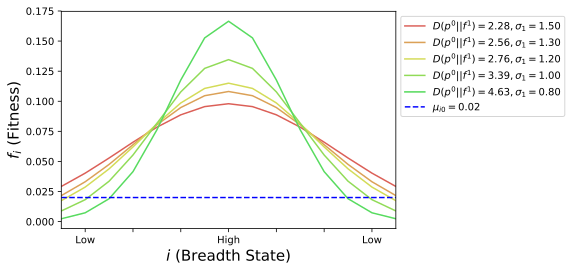

In [5]:
sns.set_palette(sns.color_palette("hls", 12))
# current_color_palette = sns.color_palette()
# sns.set_palette(current_color_palette[1:])

x_array = range(1,16)
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/'
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_arrays()
fig, ax = plt.subplots()

for i in range(0, len(protocol_data.fitness_array)):
    ax.plot(x_array, protocol_data.fitness_array[i], 
             label='$D(p^{0} || f^{1}) = ' + '%.2f' % protocol_data.kl1_array[i] + ', \\sigma_{1} = %.2f' % protocol_data.sigma_1_range[i] + '$')

ax.plot(x_array, np.zeros_like(x_array) + 0.02, 
         color='blue', linestyle='--', label="$\\mu_{i0} = 0.02$")

labels = [item.get_text() for item in ax.get_xticklabels()]

empty_string_labels = ['']*len(labels)
empty_string_labels[4] = "High"
empty_string_labels[1] = empty_string_labels[-2] = "Low"
ax.set_xticklabels(empty_string_labels)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel("$f_{i}$ (Fitness)", size=15)
plt.xlabel("$i$ (Breadth State)", size=15)
plt.xlim(1, 15)


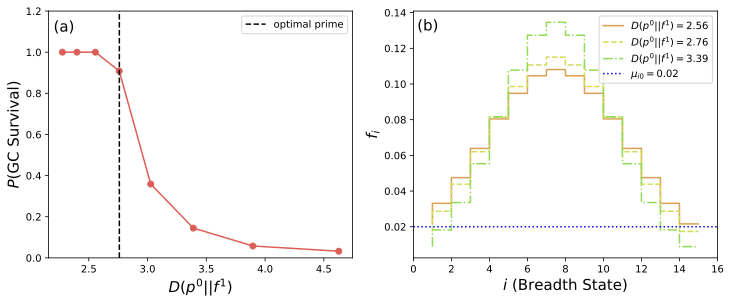

In [23]:
# plt.figure(figsize=(6,10))
plt.figure(figsize=(12,10))
sns.set_palette(sns.color_palette("hls", 12))
plt.subplot(2,2,1)
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/prime/'
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_kl1_array()
survival_fraction = protocol_data.plot_survival_fraction()
plt.axvline(x=2.76, color="black", linestyle='--', label='optimal prime')
plt.ylim(0, 1.2)
plt.text(2.2, 1.1, "(a)", size=15)
plt.xlabel("$D(p^{0} || f^{1})$", size=15)
plt.ylabel("$P($GC Survival$)$", size=15)
plt.legend()


sns.set_palette(sns.color_palette("hls", 12)[1:])
plt.subplot(2,2,2)
x_array = range(1,16)
path = '/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/'
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_arrays()

style = ['-', '-', '--', '-.', '-']
for i in range(1, len(protocol_data.fitness_array) - 1):
    plt.step(x_array, protocol_data.fitness_array[i], linestyle=style[i],
             label='$D(p^{0} || f^{1}) = ' + '%.2f' % protocol_data.kl1_array[i] + '$') # + ', \\sigma_{1} = %.2f' % protocol_data.sigma_1_range[i] + '$')

x_array = range(0,17)    
plt.plot(x_array, np.zeros_like(x_array) + 0.02, 
         color='blue', linestyle=':', label="$\\mu_{i0} = 0.02$")

# plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.legend()
plt.text(0.2, 0.13, "(b)", size=15)
plt.ylabel("$f_{i}$", size=15)
plt.xlabel("$i$ (Breadth State)", size=15)
plt.xlim(0, 16)

plt.savefig("Proof_Figures/Fig_4_gc_survival_fitness_step.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

In [35]:
def compute_n_ave(path):
    n_ave_array = [np.loadtxt(path + "Trial_{0}/n_ave".format(t)) for t in range(30)]
    return np.mean(n_ave_array, axis=0)



In [36]:
precursor = np.zeros(15)
precursor[0] = precursor[-1] = 20
precursor[1] = precursor[-2] = 5


In [37]:
relative_path = "/nfs/pool002/users/rganti/Optimal_Protocols_bnabs_pool002/data/raw/Trials_dr_0.02_muij_0.05_bins_15/"
# precursor = define_n_initial(15)

low_path = relative_path + "Sigma_1.3/Trial_0/"
low = EntropyDistributions(path=low_path)
low_nave = compute_n_ave(relative_path + "Sigma_1.3/")

optimal_path = relative_path + "Sigma_1.2/Trial_0/"
optimal = EntropyDistributions(path=optimal_path)
optimal_nave = compute_n_ave(relative_path + "Sigma_1.2/")

# high_path = "../../data/raw/extended_breadth_multiple_trials/Trials_dr_0.02_muij_0.05_bins_15/Sigma_1.0/Trial_0/"
high_path = relative_path + "Sigma_1.0/Trial_0/"
high = EntropyDistributions(path=high_path)
high_nave = compute_n_ave(relative_path + "Sigma_1.0/")

In [46]:
sns.set_palette(sns.color_palette("hls", 12))
current_color_palette = sns.color_palette()

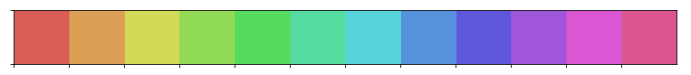

In [47]:
sns.palplot(current_color_palette)

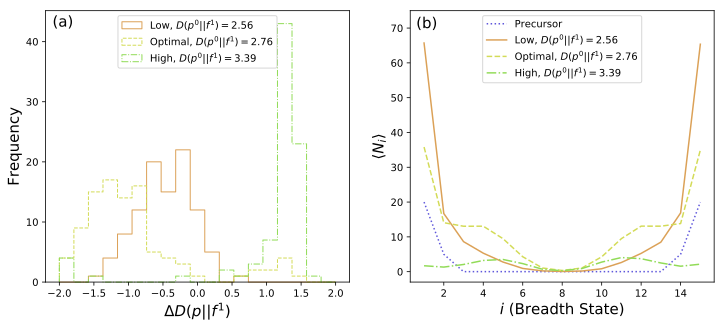

In [48]:
plt.figure(figsize=(12,5))
sns.set_palette(current_color_palette[1:])
plt.subplot(1,2,1)

bin_space = np.linspace(-2.0, 2.0, num=20)
_ = plt.hist(low.kld_array, linestyle='-', label='Low, $D(p^{0} || f^{1}) = $' + '%.2f' % low.kl_distance.compute_kl_distance(), alpha=1.0, bins=bin_space, histtype='step')
_ = plt.hist(optimal.kld_array, linestyle='--', label='Optimal, $D(p^{0} || f^{1}) = $' + '%.2f' % optimal.kl_distance.compute_kl_distance(), alpha=1.0, bins=bin_space, histtype='step')
_ = plt.hist(high.kld_array, linestyle='-.', label='High, $D(p^{0} || f^{1}) = $' + '%.2f' % high.kl_distance.compute_kl_distance(), alpha=1.0, bins=bin_space, histtype='step')

plt.text(-2.1, 42.5, "(a)", size=15)
plt.legend(loc=9)
plt.xlabel("$\Delta D(p || f^{1})$", size=15)
plt.ylabel("Frequency", size=15)


plt.subplot(1,2,2)

plt.plot(range(1, 16), precursor, linestyle=':', color=current_color_palette[-4], label='Precursor')
plt.plot(range(1, 16), low_nave, linestyle='-',
                     label='Low, $D(p^{0} || f^{1}) = $' + '%.2f' % low.kl_distance.compute_kl_distance())
plt.plot(range(1, 16), optimal_nave, linestyle='--',
                     label='Optimal, $D(p^{0} || f^{1}) = $' + '%.2f' % optimal.kl_distance.compute_kl_distance())
plt.plot(range(1, 16), high_nave, linestyle='-.',
                     label='High, $D(p^{0} || f^{1}) = $' + '%.2f' % high.kl_distance.compute_kl_distance())
plt.text(0.6, 70, "(b)", size=15)
plt.ylim(-3, 75)
plt.ylabel("$\\langle N_{i} \\rangle$", size=15)
plt.xlabel("$i$ (Breadth State)", size=15)
plt.legend()
# plt.title("Occupancy after Prime", size=15)

# plt.savefig("prime_occupancy.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

# plt.savefig("Fig_5_ni_entropy_histogram_step.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

plt.savefig("Proof_Figures/Fig_6_kld_step_ni.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)


In [49]:
path = "/nfs/pool002/users/rganti/Optimal_Protocols_bnabs_pool002/data/raw/Trials_dr_0.02_muij_0.05_bins_15/"
boost_path = path + "optimal_boost/"
optimal_pairs = np.loadtxt(path + "optimal_pairs")

In [50]:
optimal_pairs

array([[1.5     , 0.182538],
       [1.3     , 0.176825],
       [1.2     , 0.173707],
       [1.      , 0.16681 ],
       [0.8     , 0.15874 ]])

In [51]:
low_nave = compute_n_ave(boost_path + "Sigma_{0}/".format(optimal_pairs[1, 0]))
low_kl_boost = InjectionKlDistance(low_nave/np.sum(low_nave), sigma=optimal_pairs[1, 1], 
                             num_odes=len(low_nave) + 1)

optimal_nave = compute_n_ave(boost_path + "Sigma_{0}/".format(optimal_pairs[2, 0]))
optimal_kl_boost = InjectionKlDistance(optimal_nave/np.sum(optimal_nave), sigma=optimal_pairs[2, 1], 
                                 num_odes=len(optimal_nave) + 1)

high_nave = compute_n_ave(boost_path + "Sigma_{0}/".format(optimal_pairs[3, 0]))
high_kl_boost = InjectionKlDistance(high_nave/np.sum(high_nave), sigma=optimal_pairs[3, 1],
                             num_odes=len(high_nave) + 1)


In [52]:
path = "/nfs/pool002/users/rganti/Optimal_Protocols_bnabs_pool002/data/raw/Trials_dr_0.02_muij_0.05_bins_15/optimal_boost/"

low_pickle = pickle_in_data(path + "Sigma_{0}/total_num_success_dict".format(1.3))
low_array = dict_to_array(low_pickle)

optimal_pickle = pickle_in_data(path + "Sigma_{0}/total_num_success_dict".format(1.2))
optimal_array = dict_to_array(optimal_pickle)

high_pickle = pickle_in_data(path + "Sigma_{0}/total_num_success_dict".format(1.0))
high_array = dict_to_array(high_pickle)


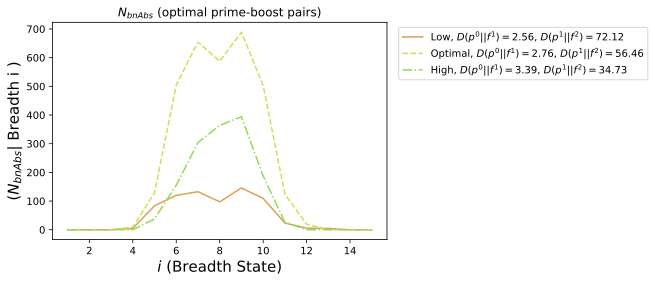

In [53]:
plt.plot(range(1, 16), low_array[1:]/30.0, color='C0', linestyle='-',
         label='Low, $D(p^{0} || f^{1}) = $' + '%.2f' % low.kl_distance.compute_kl_distance() 
         + ', $D(p^{1} || f^{2}) = $' + '%.2f' % low_kl_boost.compute_kl_distance())

plt.plot(range(1, 16), optimal_array[1:]/30.0, color='C1', linestyle='--',
        label='Optimal, $D(p^{0} || f^{1}) = $' + '%.2f' % optimal.kl_distance.compute_kl_distance()
        + ', $D(p^{1} || f^{2}) = $' + '%.2f' % optimal_kl_boost.compute_kl_distance())

plt.plot(range(1, 16), high_array[1:]/30.0, color='C2', linestyle='-.',
        label='High, $D(p^{0} || f^{1}) = $' + '%.2f' % high.kl_distance.compute_kl_distance()
        + ', $D(p^{1} || f^{2}) = $' + '%.2f' % high_kl_boost.compute_kl_distance())

plt.legend(bbox_to_anchor=(1.02, 1.00))
plt.ylabel("$(N_{bnAbs} | $ Breadth i $)$", size=15)
plt.xlabel("$i$ (Breadth State)", size=15)
plt.title("$N_{bnAbs}$ (optimal prime-boost pairs)")
plt.savefig("Proof_Figures/Fig_7_nbnabs_i.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)



# Scratch

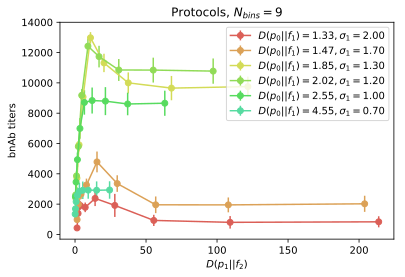

In [2]:
sns.set_palette(sns.color_palette("hls", 12))
path = "../../data/raw/extended_breadth_multiple_trials/Trials_dr_0.05_muij_0.05_bins_9/"
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_arrays()
protocol_data.plot_protocols()
plt.title("Protocols, $N_{bins} = 9$")
plt.legend()

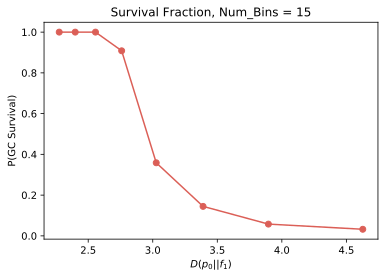

In [22]:
path = '/nfs/arupclab001/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/prime/'

sns.set_palette(sns.color_palette("hls", 12))
plt.subplot(1,1,1)
protocol_data = EnsembleProcessProtocolData(path)
protocol_data.load_kl1_array()
protocol_data.plot_survival_fraction()
# plt.legend()